In [1]:
import sys
sys.path.insert(1, '/home/msantola/MyPythonLibrary/ClimAnag/libhma/')
import climbasis as climb
from climbasis import *
import domain as dom
import myplot
import glob

In [2]:
#resultsDir='/media/maria/MARIAEXT2/WinterTrendsObs/'
sourceData='/data/msantola/obs/'


In [3]:
domain='NH'
season='DJF'
iyr=1900
fyr=2014

In [5]:
model5=str('noaaV2c')
variable='slp'
filename5 = 'prmsl_only.mon.mean.noaaV2c_185101-201412_2.0x2.0.nc'
ds50 = xr.open_dataset(sourceData+model5+'/'+filename5)['prmsl']
#lev=500
#ds5=ds50.sel(level=lev)#ds4[:,0,:,:]
ds5=dom.shifting_grid(ds50)
field5=dom.field_dom(ds5,domain)
units=ds5.units
print(units)

Pa


In [14]:
field5=field/100

In [15]:
field=field5
model=model5

##EXAMPLE ONE DATA SET (plots mainly)
#seasonal/monthly selection
vals,anoms=climb.seasonal_selection(field,season,iyr,fyr)
##Spatial
clim=vals.mean("time")
std=vals.std("time")
par=climb.trend_vect(vals.time,vals,dim='time')

#

(D- 1900  JF- 1901  to D- 2014 JF- 2015
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4


In [16]:
ds5.lat

<xarray.DataArray 'lat' (lat: 91)>
array([ 90.,  88.,  86.,  84.,  82.,  80.,  78.,  76.,  74.,  72.,  70.,  68.,
        66.,  64.,  62.,  60.,  58.,  56.,  54.,  52.,  50.,  48.,  46.,  44.,
        42.,  40.,  38.,  36.,  34.,  32.,  30.,  28.,  26.,  24.,  22.,  20.,
        18.,  16.,  14.,  12.,  10.,   8.,   6.,   4.,   2.,   0.,  -2.,  -4.,
        -6.,  -8., -10., -12., -14., -16., -18., -20., -22., -24., -26., -28.,
       -30., -32., -34., -36., -38., -40., -42., -44., -46., -48., -50., -52.,
       -54., -56., -58., -60., -62., -64., -66., -68., -70., -72., -74., -76.,
       -78., -80., -82., -84., -86., -88., -90.], dtype=float32)
Coordinates:
  * lat      (lat) float32 90.0 88.0 86.0 84.0 82.0 ... -84.0 -86.0 -88.0 -90.0
Attributes:
    units:               degrees_north
    actual_range:        [ 90. -90.]
    long_name:           Latitude
    standard_name:       latitude
    axis:                Y
    coordinate_defines:  point

In [17]:
vmin=clim.min();print(vmin)
vmax=clim.max();print(vmax)

<xarray.DataArray ()>
array(997.03720172)
<xarray.DataArray ()>
array(1034.44306959)


<xarray.DataArray ()>
array(997.03720172)
<xarray.DataArray ()>
array(1034.44306959)


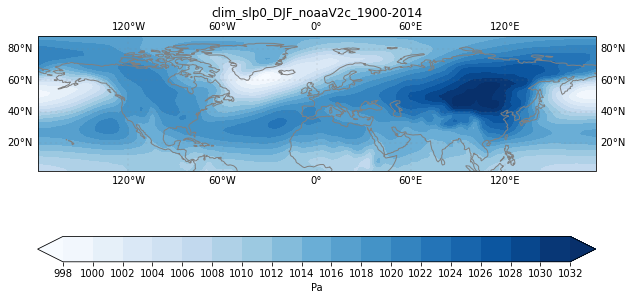

In [20]:
##Plotting
plot=clim
vmin=plot.min();print(vmin)
vmax=plot.max();print(vmax)
lev=0
title="clim"+'_'+variable+str(lev)+'_'+season+'_'+model+'_'+ str(iyr)+'-'+str(fyr)
clevs=np.arange(998,1034,2);levs_ticks=clevs 
cmap='Blues'

fig, axs = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},figsize=(10,8))

lons, lats = np.meshgrid(plot.coords[plot.dims[1]],plot.coords[plot.dims[0]])
CS1=axs.contourf(lons,lats,plot[:,:],clevs,transform=ccrs.PlateCarree(),cmap=cmap,extend='both')
axs.set_title(title,y=1.1)#,x=0.025,y=0.93,backgroundcolor= 'white')

axs.coastlines(color='grey')
gl = axs.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                          linewidth=2, color='gray', alpha=0.1, linestyle=':')

cbar=fig.colorbar(CS1,ticks=levs_ticks,orientation='horizontal',label=units)

plt.show()

<xarray.DataArray ()>
array(0.56574334)
<xarray.DataArray ()>
array(6.08820046)


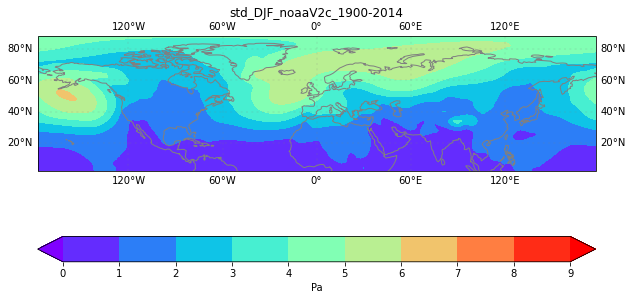

In [21]:
plot=std
vmin=plot.min();print(vmin)
vmax=plot.max();print(vmax)

title="std"+'_'+season+'_'+model+'_'+ str(iyr)+'-'+str(fyr)
clevs=np.arange(0,10,1);levs_ticks=clevs;cmap='rainbow'

fig, axs = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},figsize=(10,8))

lons, lats = np.meshgrid(plot.coords[plot.dims[1]],plot.coords[plot.dims[0]])
CS1=axs.contourf(lons,lats,plot[:,:],clevs,transform=ccrs.PlateCarree(),cmap=cmap,extend='both')
axs.set_title(title,y=1.1)#,x=0.025,y=0.93,backgroundcolor= 'white')

axs.coastlines(color='grey')
gl = axs.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                          linewidth=2, color='gray', alpha=0.1, linestyle=':')

cbar=fig.colorbar(CS1,ticks=levs_ticks,orientation='horizontal',label=units)

plt.show()

<xarray.DataArray ()>
array(-0.51001396)
<xarray.DataArray ()>
array(0.2816796)


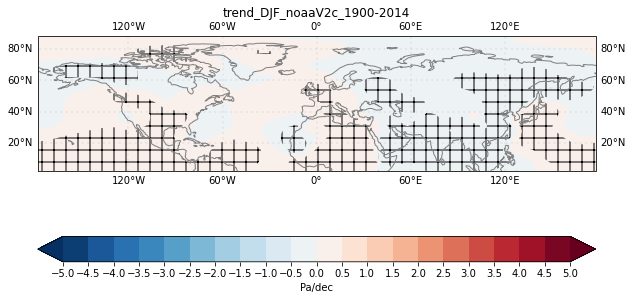

In [23]:
plot=par[0]*10
sig=par[3]

vmin=plot.min();print(vmin)
vmax=plot.max();print(vmax)

title="trend"+'_'+season+'_'+model+'_'+ str(iyr)+'-'+str(fyr)
clevs=np.arange(-5,5.5,0.5);levs_ticks=clevs;cmap='RdBu_r'

fig, axs = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},figsize=(10,8))

lons, lats = np.meshgrid(plot.coords[plot.dims[1]],plot.coords[plot.dims[0]])
CS1=axs.contourf(lons,lats,plot,clevs,transform=ccrs.PlateCarree(),cmap=cmap,extend='both')
levels=[0,0.1,1.0]
cs = axs.contourf(lons,lats,sig[:,:], transform=ccrs.PlateCarree(),levels=levels,
                hatches=["+", ""], alpha=0.)
axs.set_title(title,y=1.1)#,x=0.025,y=0.93,backgroundcolor= 'white')

axs.coastlines(color='grey')
gl = axs.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                          linewidth=2, color='gray', alpha=0.1, linestyle=':')

cbar=fig.colorbar(CS1,ticks=levs_ticks,orientation='horizontal',label=units+'/dec')

plt.show()

In [28]:
#Average
domain='HMA'
##Time series and trend
ts=climb.spatial_average(dom.field_dom(vals,domain))
par_avg=stats.linregress(ts.time,ts)
print(par_avg)


LinregressResult(slope=0.0845356750160703, intercept=5493.527724730507, rvalue=0.20920511376949433, pvalue=0.02484158804921213, stderr=0.03717152857952611, intercept_stderr=72.7551464475688)


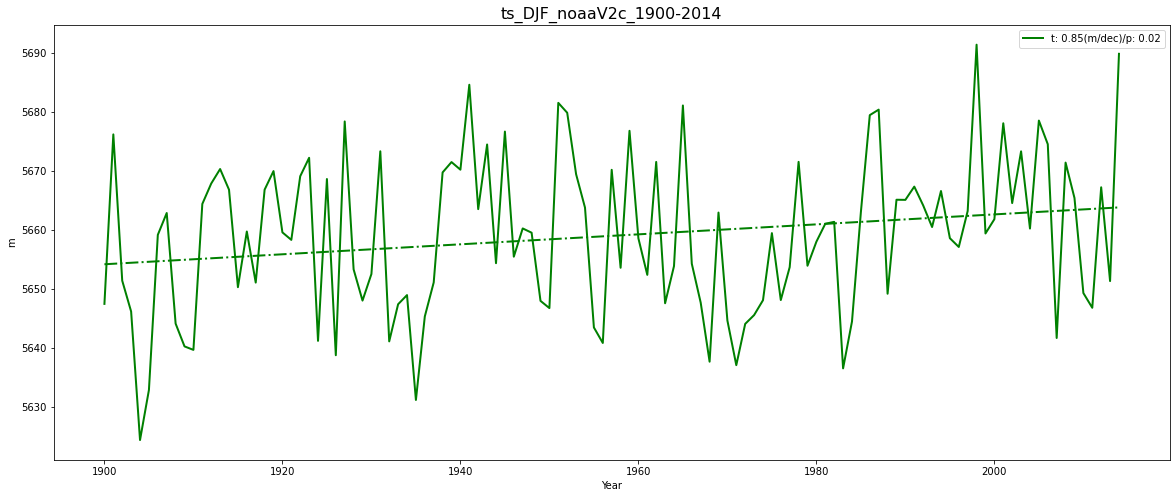

In [29]:
title="ts"+'_'+season+'_'+model+'_'+ str(iyr)+'-'+str(fyr)

fig, ax = plt.subplots(figsize=(20, 8))
my_ticks=np.arange(iyr,fyr+1,1)
ax.plot(ts.time,ts,color='green', linestyle='solid',label='t: '+str(round(10*par_avg[0], 2))+'('+units+'/dec)'+'/'+ 'p: '+str(round(par_avg[3], 2)),linewidth=2)
ax.plot(ts.time,par_avg[0]*ts.time+par_avg[1],color='green', linestyle='-.',linewidth=2)

#ax.axhline(0, color='lightgrey')
#ax.set_ylim(-3, 3)
ax.set_xlabel('Year')
ax.set_ylabel(units)
plt.legend()
ax.set_title(title, fontsize=16)
#plt.savefig(resultsDir+plotnameTs+'.png',format='png')
plt.show()

In [30]:
##Annual cycle: mean and trend 
calendar_avg=[]
calendar_par=[]
monthList=['mon01','mon02','mon03','mon04','mon05','mon06','mon07','mon08','mon09','mon10','mon11','mon12']
for i in np.arange(0,12,1):
    rmon=monthList[i]
    v,a=climb.monthly_selection(dom.field_dom(field,'HMA'),rmon,iyr,fyr)
    avg0=climb.spatial_average(v)
    avg=avg0.mean(dim='time')
    par=stats.linregress(np.arange(iyr,fyr+1,1),avg0)
    calendar_avg.append(avg)
    calendar_par.append(par)

lat lon
lat lon
lat lon
lat lon
lat lon
lat lon
lat lon
lat lon
lat lon
lat lon
lat lon
lat lon


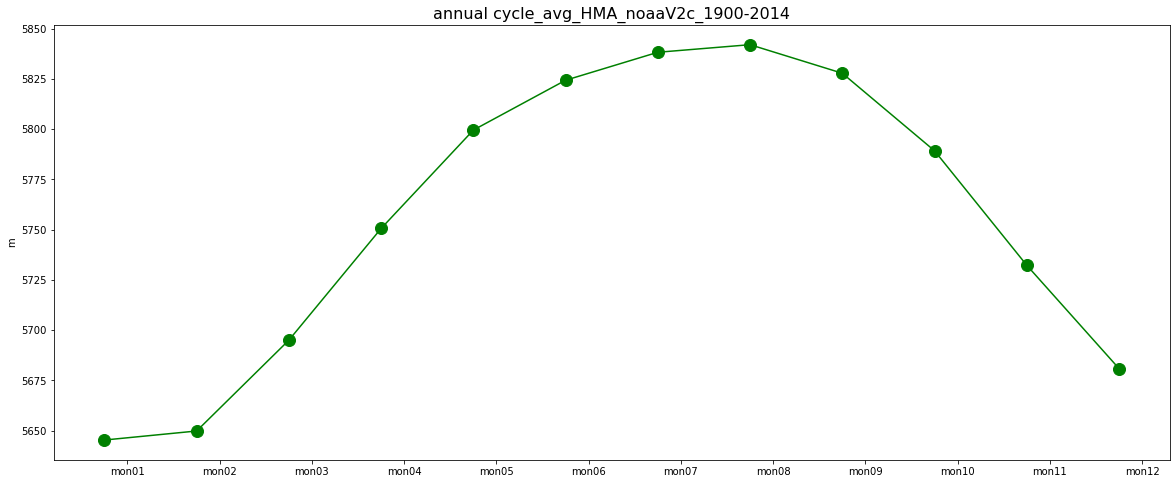

In [31]:
xd=np.arange(0,12,1)
nameList=monthList
title="annual cycle_"+"avg_"+domain+'_'+ model+'_'+ str(iyr)+'-'+str(fyr)
fig, axes = plt.subplots(figsize=(20, 8))
#for x,y,yerr,p,m,colors in zip(xd,trendYO,std_errYO,pvalueYO,nameList,colorList):
axes.errorbar(xd,calendar_avg,marker='o',color='green',markersize=12)
#axes.axhline(y=0.0, linewidth=2, color='lightgrey')
axes.set(xticks=xd+0.25, xticklabels=nameList)
axes.set_ylabel(units)
axes.set_title(title, fontsize=16)

plt.show()

In [32]:
##annnual cycle trend
trend=[];pvalue=[];std_err=[]
for i in range(len(calendar_par)):
    tmp=10*calendar_par[i][0]; tmp1=calendar_par[i][3];tmp2=10*calendar_par[i][4]
    trend.append(tmp);pvalue.append(tmp1);std_err.append(tmp2)

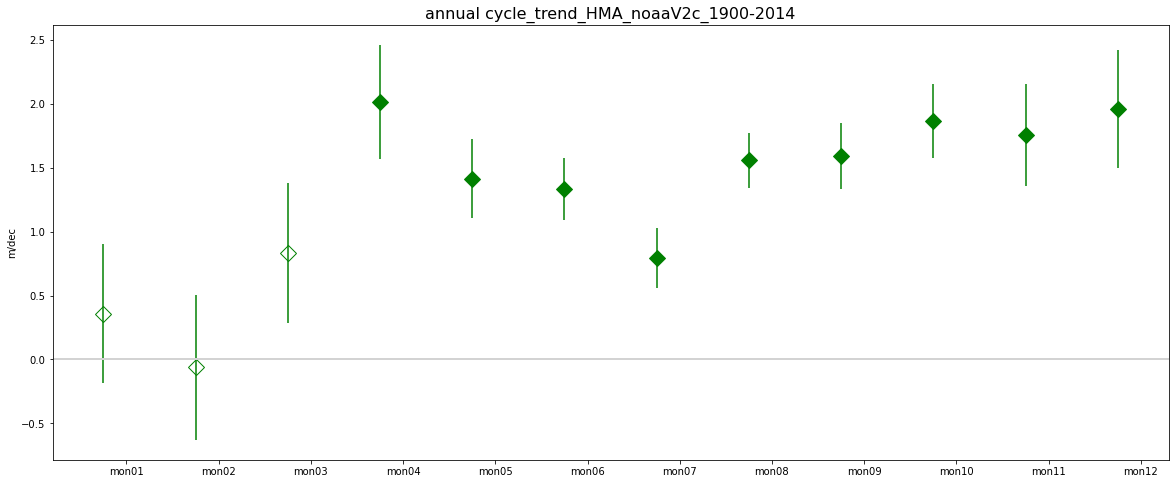

In [33]:
xd=np.arange(0,12,1)
nameList=monthList
title="annual cycle_"+"trend_"+domain+'_'+ model+'_'+ str(iyr)+'-'+str(fyr)
fig, axes = plt.subplots(figsize=(20, 8))
#for x,y,yerr,p,m,colors in zip(xd,trendYO,std_errYO,pvalueYO,nameList,colorList):
for i in range(12):
    if pvalue[i]<=0.01:
        axes.errorbar(xd[i],trend[i],yerr=std_err[i],marker='D',color='green',markersize=12)
    else:
        axes.errorbar(xd[i],trend[i],yerr=std_err[i],marker='D',fillstyle='none',mfc='white', zorder=1,color='green',markersize=12)
axes.axhline(y=0.0, linewidth=2, color='lightgrey')
axes.set(xticks=xd+0.25, xticklabels=nameList)
axes.set_ylabel(units+'/dec')
axes.set_title(title, fontsize=16)

plt.show()